## Assgiment 3

### Isma_PYTN - KS011- 008

#### Python for Data Science - Studi Independen - kampus Merdeka

list dari perintah di module kode id :

1. Vizualization data

2. Logistic Regression

3. KNN

4. SVM

5. Decission Tree

6. Random Forest

7. Naive Bayes

8. Conclution

### Mengimport Library & dataset yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df

print('succes !!!')

succes !!!


### Exploration Data

In [3]:
df # menampilkan dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe() #menampilkan describe dari dataset

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info() # menampilkan info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape # menampilkan shape dari dataset

(45211, 17)

Dari proses Explorating dataset diatas dapat dianalisiskan bahwa terdapat 17 kolom dan 45211 baris, yang dimana diantaranya bertype data int dan object

### Cleaning data

In [7]:
df.head() # menampilkan  5 teratas dari dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.tail() # menampilkan 5 terbawah dari dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Dapat dilihat data diatas terdapat kolom yang tidak memiliki value yaitu contact, poutcome, default. namun sebelum kolom dilakukan pengecekan pada setiap kolomnya.

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dari Proses data diatas dapat dianalisiskan bahwa tidak terdapat data yang memiliki valeu miss, namun ada beberapa kolom yang harus dihapus karena tidak memiliki value yang jelas.

In [10]:
df = df.drop(columns=['contact', 'poutcome', 'default'])
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,5,may,198,1,-1,0,no


### 1. Visualization data

In [11]:
df[['job']]

,job
0,management
1,technician
2,entrepreneur
3,blue-collar
4,unknown
...,...
45206,technician
45207,retired
45208,retired
45209,blue-collar


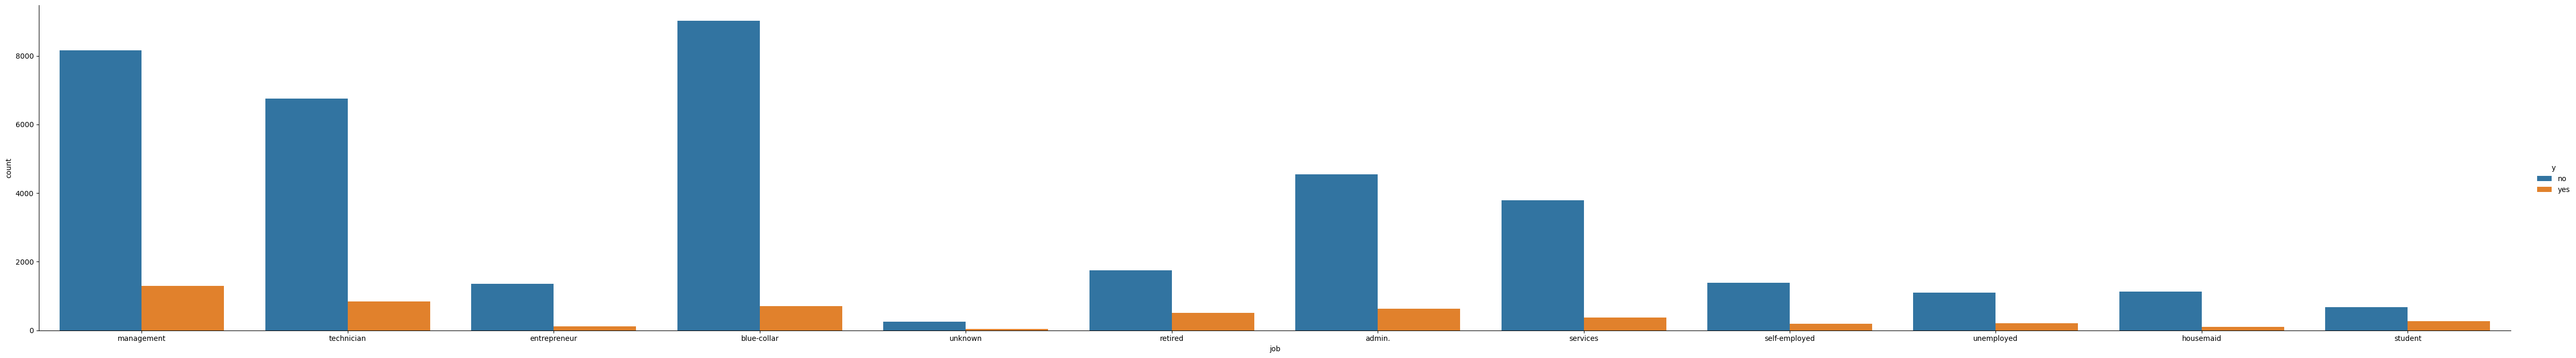

In [12]:
sns.catplot(x='job',hue='y',kind='count',data=df, aspect=7, height=7)

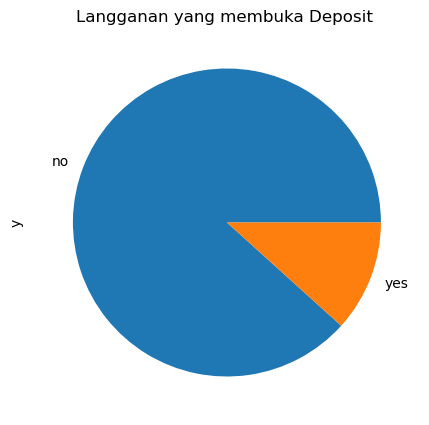

In [13]:
df["y"].value_counts().plot(kind="pie", figsize=(5,5))
plt.xticks(rotation=0)
plt.title("Langganan yang membuka Deposit ")
plt.show()

berdasarkan grafik dan piechart diatas dapat dianalisiskan bahwa pekerjaan blue collar yang paling rendah melakukan langganan dan menggunakan deposit di bank tersebut, Dan hanya sedikit yang menyatakan iya untuk membuka deposit pada bank ini

### Modelling Data

In [15]:
df

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,17,nov,508,4,-1,0,no


selanjutnya dilakukan pengubahan variabel kategorikal menjadi variabel numerikal dengan melakukan proses One-Hot-Encode terhadap variabel kategorikal

In [16]:
X = df[['age', 'balance', 'day', 'duration', 'campaign', 'job', 'marital']]
y = df['y']
X = pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2143,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,2,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### 2. Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train) #training model
reg_pred = model.predict(X_test) #data test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
matrix = confusion_matrix(y_test, reg_pred)
print(matrix)

[[11789   180]
 [ 1323   272]]


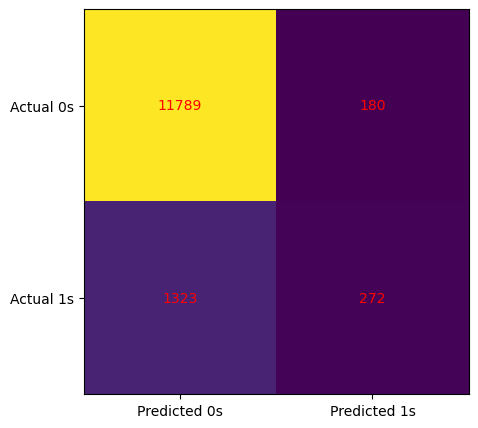

In [20]:
cm = confusion_matrix(y_test, reg_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [21]:
print(accuracy_score(y_test, reg_pred)) #manampilkan accurasy

0.8891919787673253


In [22]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11969
         yes       0.60      0.17      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



berdasarkan data yang telah diolah dan divusalisasikan diatas terdapat nilai 11763 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 180 yang merupakan nilai tersebut positif salah, selanjutnya nilai 1323 merupakan nilai negatif salah, dan terakhir nilai 272 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.889.

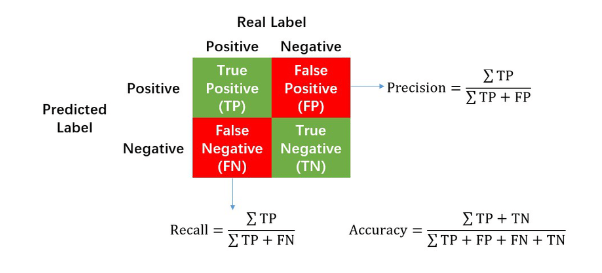

### 3. KNN

In [23]:
model = KNeighborsClassifier()
model.fit(X_train, y_train) # data training
knn_pred = model.predict(X_test) # data test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
matrix = confusion_matrix(y_test, knn_pred)
print(matrix)

[[11567   402]
 [ 1264   331]]


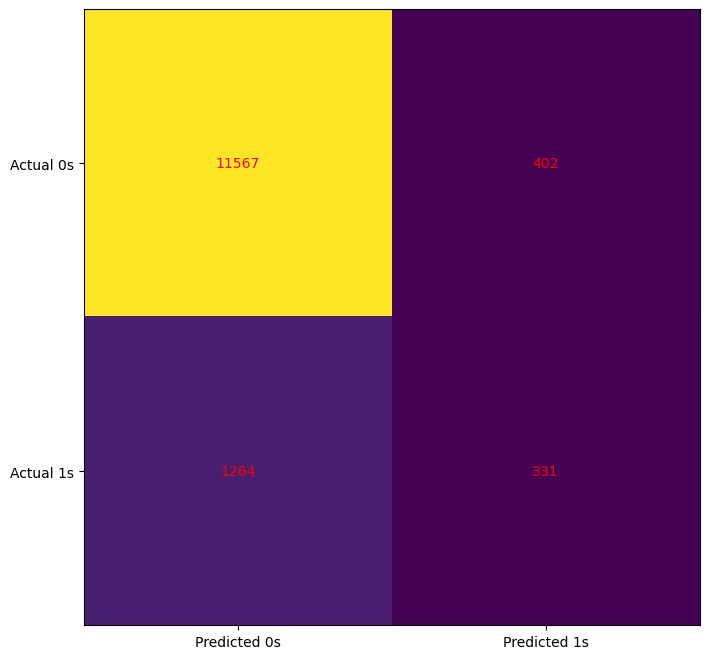

In [25]:
cm = confusion_matrix(y_test, knn_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [26]:
print(accuracy_score(y_test, knn_pred))

0.8771748746682395


In [27]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93     11969
         yes       0.45      0.21      0.28      1595

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



berdasarkan data yang telah diolah dan divisualisasikan dengan compution matrix diatas terdapat nilai 11567 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 402 yang merupakan nilai tersebut positif salah, selanjutnya nilai 1264 merupakan nilai negatif salah, dan terakhir nilai 331 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.889.

### 4. SVM

In [28]:
model = svm.SVC() #model klasifikasi
model.fit(X_train, y_train) # data training
svm_pred = model.predict(X_test) # data test

In [29]:
matrix = confusion_matrix(y_test, svm_pred)
print(matrix)

[[11966     3]
 [ 1589     6]]


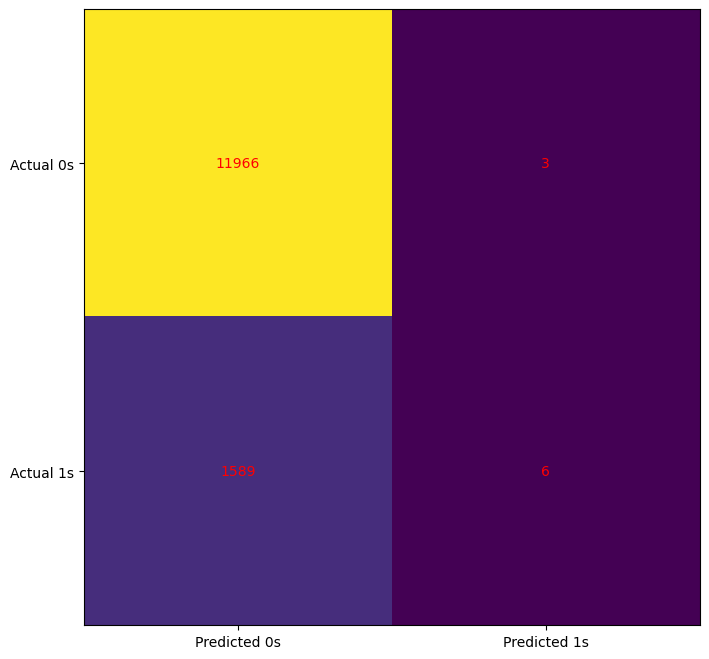

In [30]:
cm = confusion_matrix(y_test, svm_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


In [31]:
print(accuracy_score(y_test, svm_pred))

0.8826304924800944


In [32]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     11969
         yes       0.67      0.00      0.01      1595

    accuracy                           0.88     13564
   macro avg       0.77      0.50      0.47     13564
weighted avg       0.86      0.88      0.83     13564



berdasarkan data yang telah diolah dan divisualisasikan dengan compution matrix diatas terdapat nilai 11966 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 3 yang merupakan nilai tersebut positif salah, selanjutnya nilai 1589 merupakan nilai negatif salah, dan terakhir nilai 6 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.882.

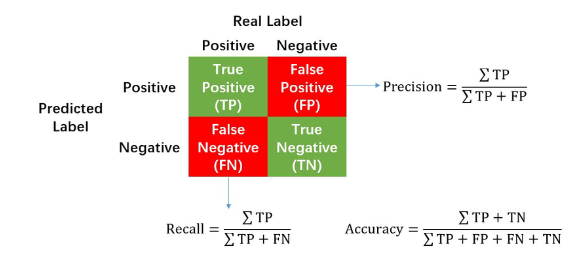

### 5. Decission Tree

In [33]:
model = DecisionTreeClassifier() #model klasifikasi
model.fit(X_train, y_train) # data train
dct_pred = model.predict(X_test) # data test

In [34]:
matrix = confusion_matrix(y_test, dct_pred)
print(matrix)

[[10771  1198]
 [ 1037   558]]


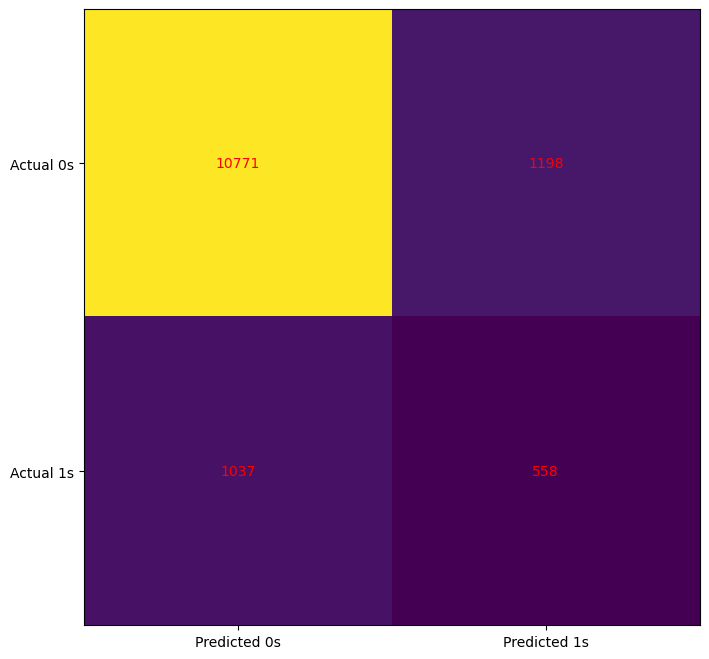

In [35]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, dct_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [36]:
# Evaluasi Model

print(accuracy_score(y_test, dct_pred))

0.8352255971689767


In [37]:
print(classification_report(y_test, dct_pred))

              precision    recall  f1-score   support

          no       0.91      0.90      0.91     11969
         yes       0.32      0.35      0.33      1595

    accuracy                           0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



berdasarkan data yang telah diolah dan divisualisasikan dengan compution matrix diatas terdapat nilai 10803 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 1166 yang merupakan nilai tersebut positif salah, selanjutnya nilai 1040 merupakan nilai negatif salah, dan terakhir nilai 5555 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.837.

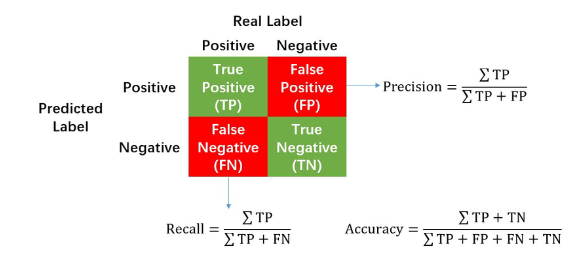

### 6. Random Forest

In [38]:
model = RandomForestClassifier() # model klasifikasi
model.fit(X_train, y_train) # data train
rfc_pred = model.predict(X_test) # data test

In [39]:
matrix = confusion_matrix(y_test, rfc_pred)
print(matrix)

[[11702   267]
 [ 1231   364]]


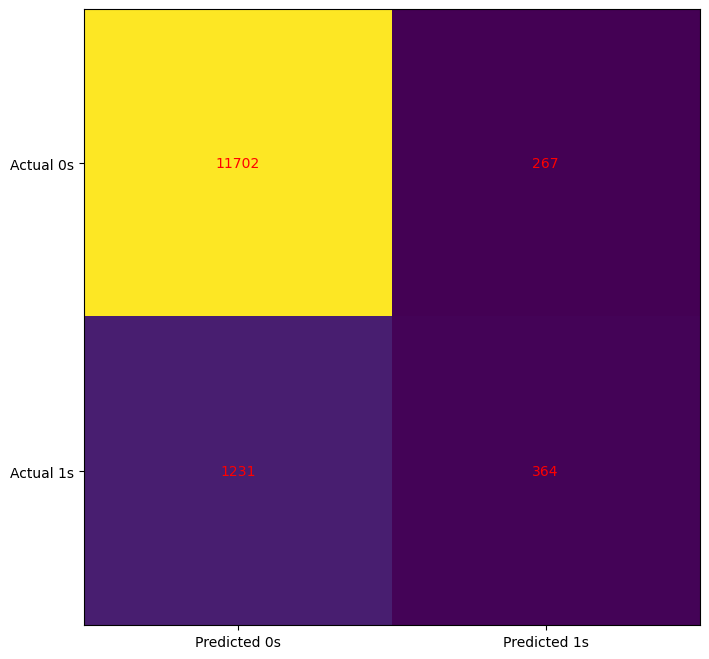

In [40]:
cm = confusion_matrix(y_test, rfc_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [41]:
print(accuracy_score(y_test, rfc_pred))

0.8895606015924507


In [42]:

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11969
         yes       0.58      0.23      0.33      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



berdasarkan data yang telah diolah dan divisualisasikan dengan compution matrix diatas terdapat nilai 11688 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 281 yang merupakan nilai tersebut positif salah, selanjutnya nilai 1222 merupakan nilai negatif salah, dan terakhir nilai 373 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.889.

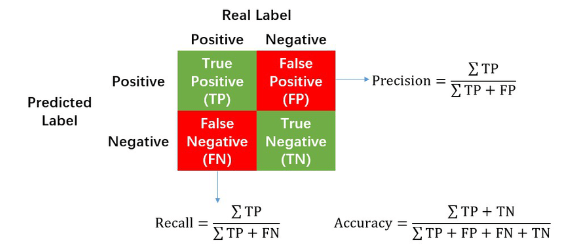

### 7. Naive Bayes

In [43]:
model = GaussianNB() #model klasifikasi
model.fit(X_train, y_train) # data train
NB_pred = model.predict(X_test) # data test

In [44]:
matrix = confusion_matrix(y_test, NB_pred)
print(matrix)

[[10816  1153]
 [  951   644]]


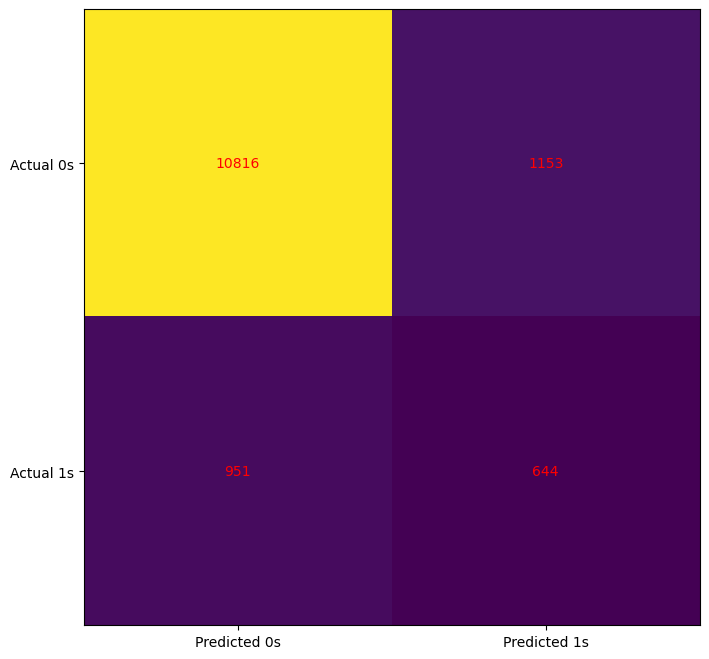

In [45]:
cm = confusion_matrix(y_test, NB_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [46]:
print(accuracy_score(y_test, NB_pred))

0.8448835151872603


In [47]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91     11969
         yes       0.36      0.40      0.38      1595

    accuracy                           0.84     13564
   macro avg       0.64      0.65      0.65     13564
weighted avg       0.85      0.84      0.85     13564



berdasarkan data yang telah diolah dan divisualisasikan dengan compution matrix diatas terdapat nilai 10816 yang dimana nilai ini merupakan prediksi positif benar, dan kemudian terdapat nilai 1153 yang merupakan nilai tersebut positif salah, selanjutnya nilai 951 merupakan nilai negatif salah, dan terakhir nilai 644 sebagai nilai prediksi negatif benar. 

pada algoritma kali ini mendapatkan accurasi 0.844.

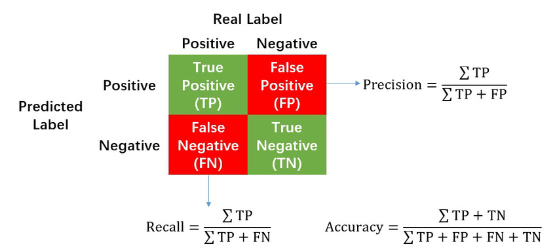

## 8. Conclusion

1. Dari Proses data diatas dapat dianalisiskan bahwa tidak terdapat data yang memiliki valeu miss, namun ada beberapa kolom yang harus dihapus karena tidak memiliki value yang jelas.

2. pekerjaan blue collar yang paling rendah melakukan langganan dan menggunakan deposit di bank tersebut, Dan hanya sedikit yang menyatakan iya untuk membuka deposit pada bank ini


In [50]:
conc = pd.DataFrame([{'Model' : 'Logistic Regression', 'Accuracy' : '0.889'},
                   {'Model' : 'K-Nearst Neighbors', 'Accuracy' : '0.877'},
                   {'Model' : 'Support Vector Machine', 'Accuracy' : '0.882'},
                   {'Model' : 'Decision Tree', 'Accuracy' : '0.837'},
                   {'Model' : 'Random Forest', 'Accuracy' : '0.889'},
                   {'Model' : 'Naive Bayes', 'Accuracy' : '0.844'}])
conc

,Model,Accuracy
0,Logistic Regression,0.889
1,K-Nearst Neighbors,0.877
2,Support Vector Machine,0.882
3,Decision Tree,0.837
4,Random Forest,0.889
5,Naive Bayes,0.844


dari beberapa algortma yang telah duji diatas dapat disimpulkan bahwa algoritma "Logistic regression" dan "random forest" memiliki tingkat accurasy yang sama dan lebih tinggi dari algoritma lainnya